In [ ]:
'''
Five Number Summary:
    The five-number summary is a descriptive statistic that provides a quick overview of the distribution of a dataset. 
    It consists of the following five values:
    1. Minimum: The smallest value in the dataset.
    2. First Quartile (Q1): The median of the lower half of the dataset (25th percentile).
    3. Median (Q2): The middle value of the dataset (50th percentile).
    4. Third Quartile (Q3): The median of the upper half of the dataset (75th percentile).
    5. Maximum: The largest value in the dataset.
    The five-number summary is useful for understanding the spread and center of a dataset, as well as identifying potential outliers.
    It is often visualized using a box plot, which displays the five-number summary along with potential outliers.
'''

📊 Data Sample:
      Value
0  0.496714
1 -0.138264
2  0.647689
3  1.523030
4 -0.234153
📊 Five Number Summary:
Minimum: -3.24
Q1 (25%): -0.65
Median (50%): 0.03
Q3 (75%): 0.65
Maximum: 3.85


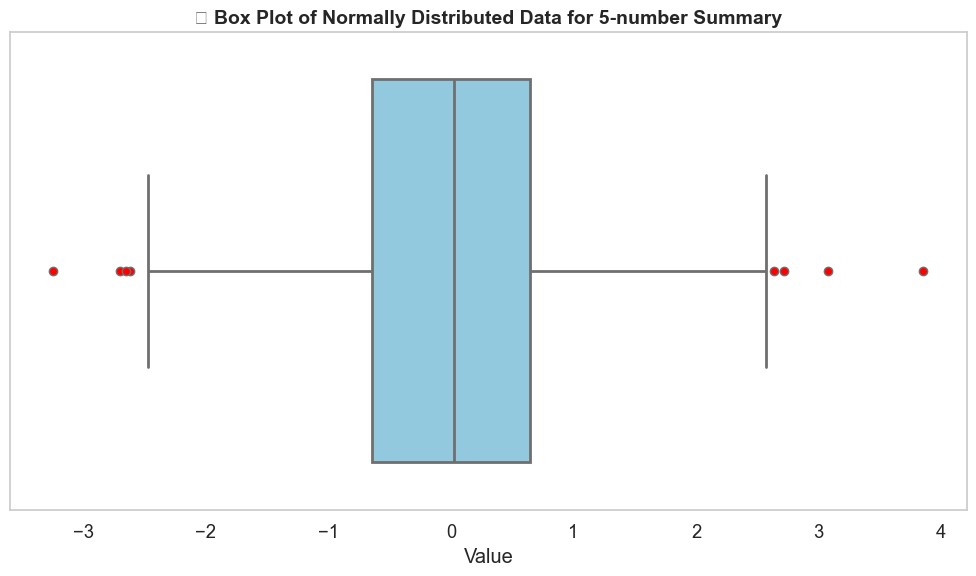

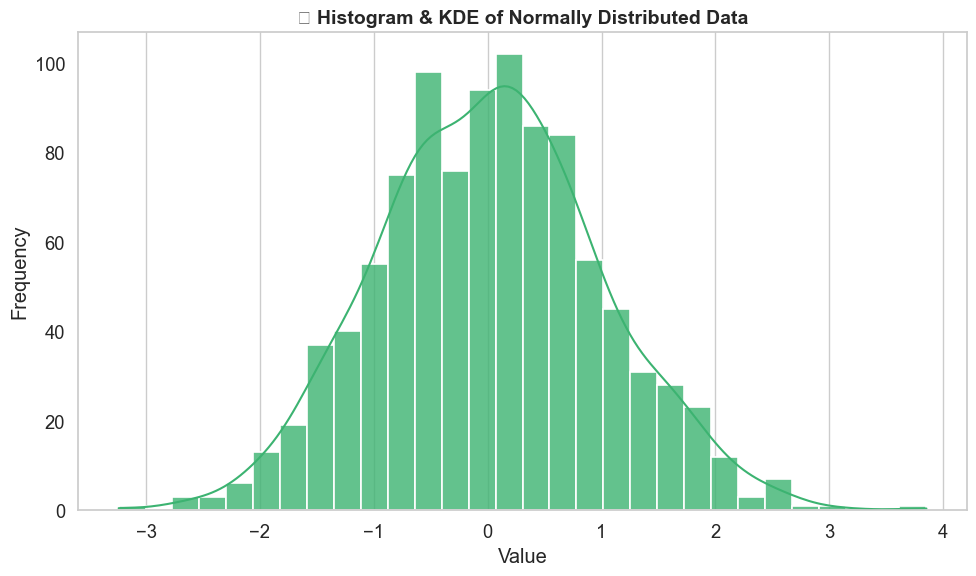

In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set style and global visual configuration
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

# Seed for reproducibility
np.random.seed(42)

# Generate random normal data
data = np.random.normal(loc=0, scale=1, size=1000)
df = pd.DataFrame(data, columns=['Value'])
print("📊 Data Sample:")
print(df.head())

# Calculate five-number summary
five_number_summary = {
    'Minimum': df['Value'].min(),
    'Q1 (25%)': df['Value'].quantile(0.25),
    'Median (50%)': df['Value'].median(),
    'Q3 (75%)': df['Value'].quantile(0.75),
    'Maximum': df['Value'].max()
}

# Display the summary
print("📊 Five Number Summary:")
for key, value in five_number_summary.items():
    print(f"{key}: {value:.2f}")

# ----------- Box Plot -----------
plt.figure()
sns.boxplot(
    x='Value',
    data=df,
    color='skyblue',
    linewidth=2,
    fliersize=5,  # outlier marker size
    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')
)
plt.title('📦 Box Plot of Normally Distributed Data for 5-number Summary', fontsize=14, weight='bold')
plt.xlabel('Value')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ----------- Histogram + KDE Plot -----------
plt.figure()
sns.histplot(
    df['Value'],
    bins=30,
    kde=True,
    color='mediumseagreen',
    edgecolor='white',
    alpha=0.8,
    linewidth=1.2
)
plt.title('📈 Histogram & KDE of Normally Distributed Data', fontsize=14, weight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
'''Testing and removing outliers'''

📊 Data Sample:
   Value
0      1
1      2
2      2
3      2
4      3
📊 Five Number Summary:
Minimum: 1.00
Q1 (25%): 3.00
Median (50%): 5.00
Q3 (75%): 6.75
Maximum: 27.00


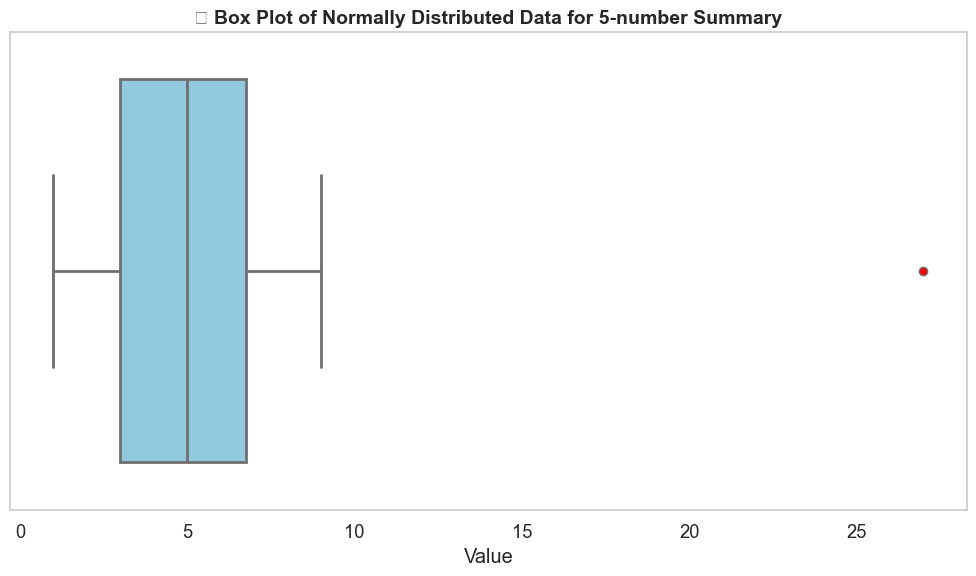

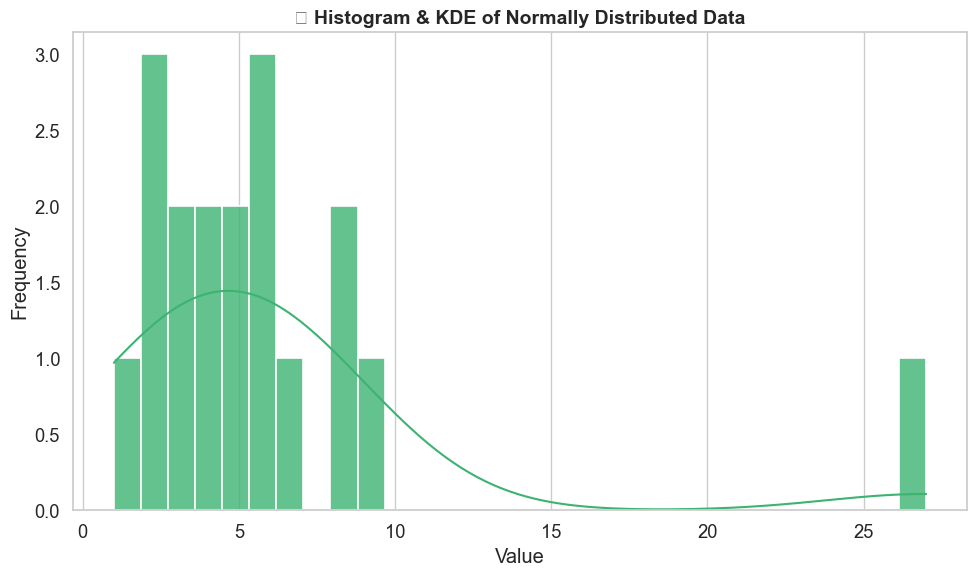

In [12]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set style and global visual configuration
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

# Generate random normal data
data = [1,2,2,2,3,3,4,4,5,5,6,6,6,7,8,8,9,27]
df = pd.DataFrame(data, columns=['Value'])
print("📊 Data Sample:")
print(df.head())

# Calculate five-number summary
five_number_summary = {
    'Minimum': df['Value'].min(),
    'Q1 (25%)': df['Value'].quantile(0.25),
    'Median (50%)': df['Value'].median(),
    'Q3 (75%)': df['Value'].quantile(0.75),
    'Maximum': df['Value'].max()
}

# Display the summary
print("📊 Five Number Summary:")
for key, value in five_number_summary.items():
    print(f"{key}: {value:.2f}")

# ----------- Box Plot -----------
plt.figure()
sns.boxplot(
    x='Value',
    data=df,
    color='skyblue',
    linewidth=2,
    fliersize=5,  # outlier marker size
    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')
)
plt.title('📦 Box Plot of Normally Distributed Data for 5-number Summary', fontsize=14, weight='bold')
plt.xlabel('Value')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ----------- Histogram + KDE Plot -----------
plt.figure()
sns.histplot(
    df['Value'],
    bins=30,
    kde=True,
    color='mediumseagreen',
    edgecolor='white',
    alpha=0.8,
    linewidth=1.2
)
plt.title('📈 Histogram & KDE of Normally Distributed Data', fontsize=14, weight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


📊 Cleaned Data Sample:
   Value
0      1
1      2
2      2
3      2
4      3
📊 Five Number Summary (Cleaned Data):
Minimum: 1.00
Q1 (25%): 3.00
Median (50%): 5.00
Q3 (75%): 6.00
Maximum: 9.00


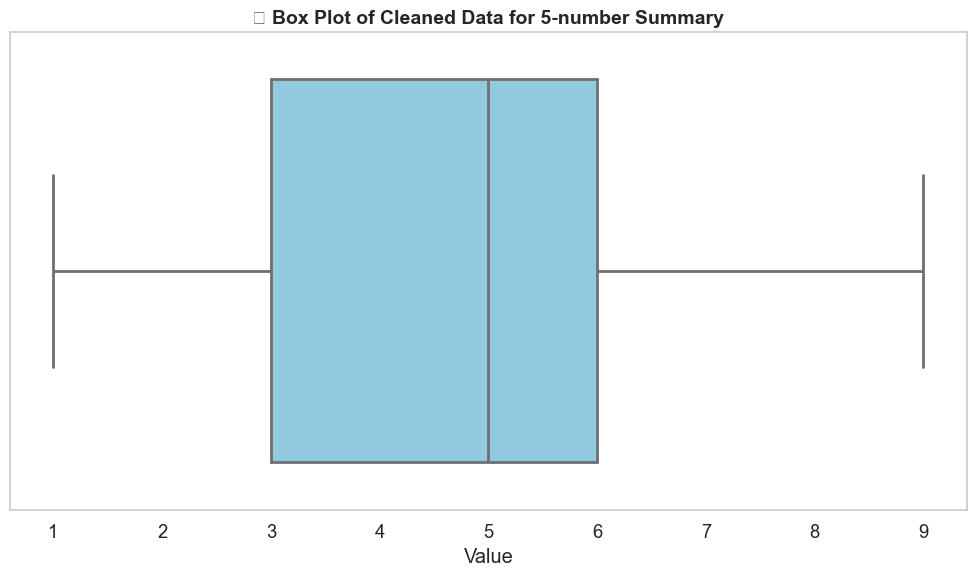

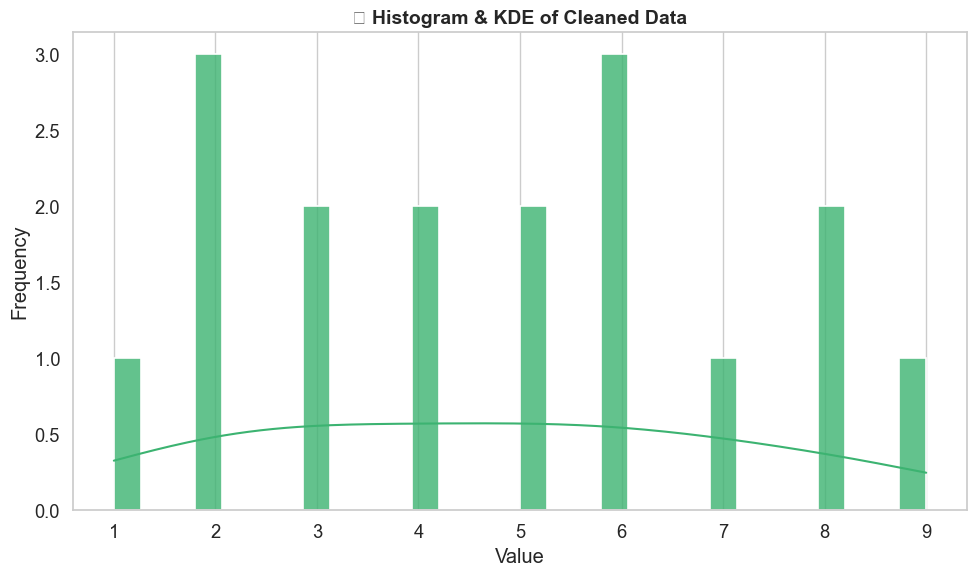

'\nThe five-number summary provides a quick overview of the distribution of a dataset, including the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.\nThe box plot visually represents these statistics, highlighting the spread and potential outliers in the data.\n'

In [ ]:
# clean the outliers
# IQR method (Interquartile Range)
# The IQR method is a common technique for identifying and removing outliers from a dataset.


def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)] #removing the outliers
# Remove outliers
cleaned_data = remove_outliers_iqr(df['Value'])
df_cleaned = pd.DataFrame(cleaned_data, columns=['Value'])
print("📊 Cleaned Data Sample:")
print(df_cleaned.head())
# Calculate five-number summary for cleaned data
five_number_summary_cleaned = {
    'Minimum': df_cleaned['Value'].min(),
    'Q1 (25%)': df_cleaned['Value'].quantile(0.25),
    'Median (50%)': df_cleaned['Value'].median(),
    'Q3 (75%)': df_cleaned['Value'].quantile(0.75),
    'Maximum': df_cleaned['Value'].max()
}
# Display the summary
print("📊 Five Number Summary (Cleaned Data):")
for key, value in five_number_summary_cleaned.items():
    print(f"{key}: {value:.2f}")    
# ----------- Box Plot for Cleaned Data -----------
plt.figure()
sns.boxplot(
    x='Value',
    data=df_cleaned,
    color='skyblue',
    linewidth=2,
    fliersize=5,  # outlier marker size
    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')
)
plt.title('📦 Box Plot of Cleaned Data for 5-number Summary', fontsize=14, weight='bold')
plt.xlabel('Value')
plt.grid(axis='x')
plt.tight_layout()
plt.show()
# ----------- Histogram + KDE Plot for Cleaned Data -----------
plt.figure()
sns.histplot(
    df_cleaned['Value'],
    bins=30,
    kde=True,
    color='mediumseagreen',
    edgecolor='white',
    alpha=0.8,
    linewidth=1.2
)
plt.title('📈 Histogram & KDE of Cleaned Data', fontsize=14, weight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Conclusion
'''
The five-number summary provides a quick overview of the distribution of a dataset, including the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.
The box plot visually represents these statistics, highlighting the spread and potential outliers in the data.
'''